In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt
import warnings

warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df=pd.read_csv(r"E:\DS Course\Rose.csv",parse_dates=True)
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [3]:
df.duplicated().sum()

0

In [4]:
missing_rows = df[df.isnull().any(axis=1)]

print(missing_rows)

    YearMonth  Rose
174   1994-07   NaN
175   1994-08   NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [6]:
df.shape

(187, 2)

In [7]:
df_copy=df.copy()

In [8]:
date=pd.date_range(start="1980-01-01",freq="MS",periods=len(df))
date

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', length=187, freq='MS')

In [9]:
df_copy.set_index(date, inplace=True)
df_copy.head()

,YearMonth,Rose
1980-01-01,1980-01,112.0
1980-02-01,1980-02,118.0
1980-03-01,1980-03,129.0
1980-04-01,1980-04,99.0
1980-05-01,1980-05,116.0


In [10]:
df_copy.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [11]:
df_copy.drop("YearMonth", axis=1, inplace=True)

Text(0, 0.5, 'Sales of Rose Wine')

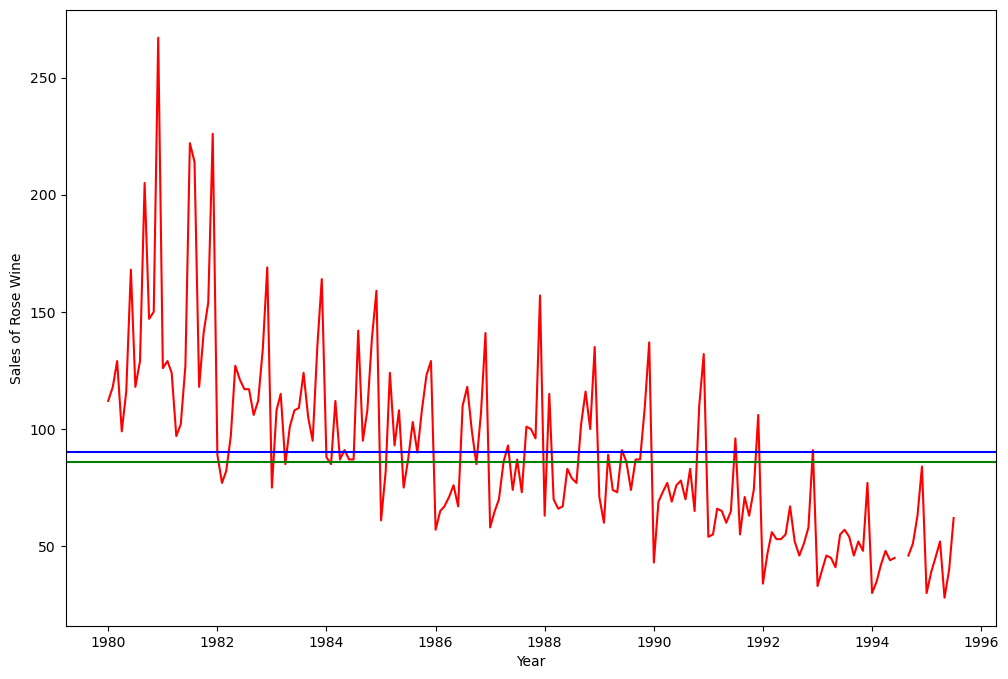

In [12]:
plt.figure(figsize=(12,8))
plt.plot(df_copy["Rose"], color="Red")
plt.axhline(df_copy["Rose"].mean(), color="Blue")
plt.axhline(df_copy["Rose"].median(), color="Green")
plt.xlabel("Year")
plt.ylabel("Sales of Rose Wine")

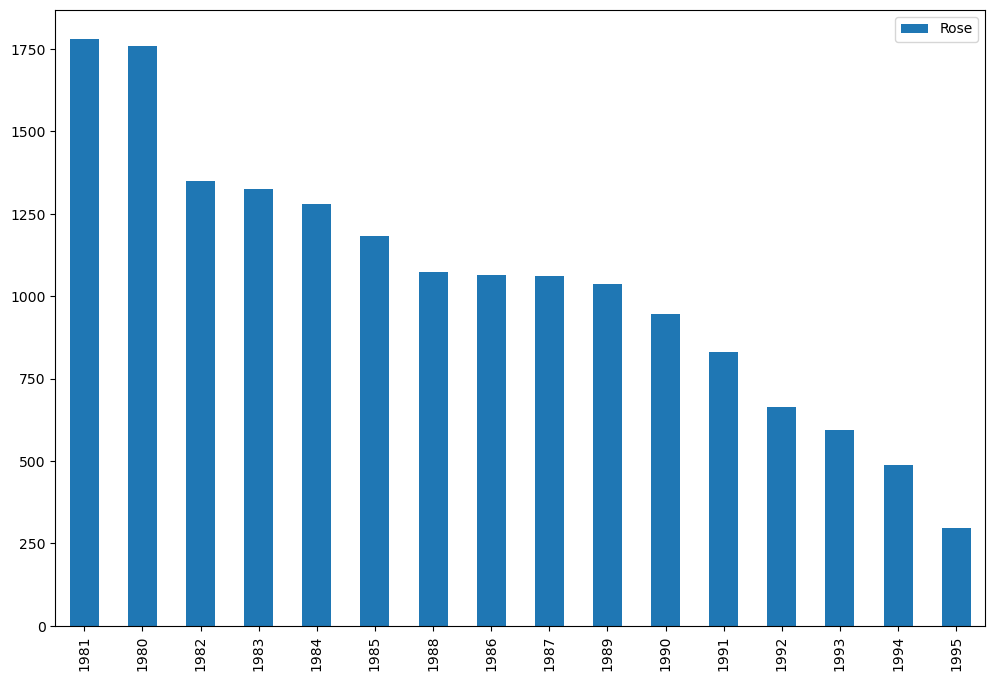

In [13]:
plt.figure(figsize=(12,8))
df_copy.groupby(df_copy.index.year)["Rose"].sum().sort_values(ascending=False).plot(kind="bar")
plt.legend(loc="best")

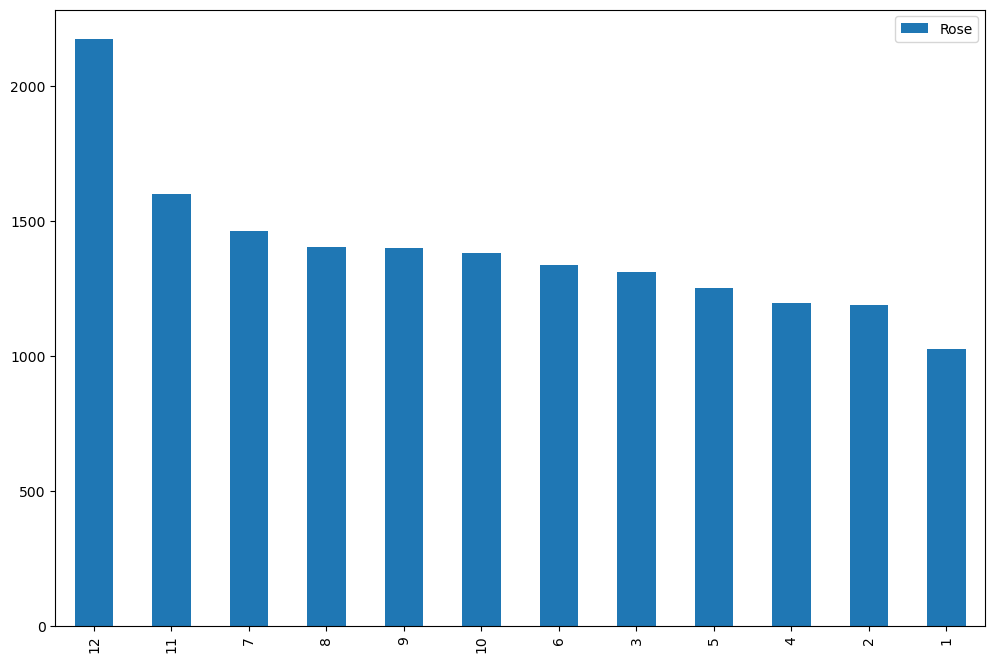

In [14]:
plt.figure(figsize=(12,8))
df_copy.groupby(df_copy.index.month)["Rose"].sum().sort_values(ascending=False).plot(kind="bar")
plt.legend(loc="best")

Text(0.5, 0, 'Year')

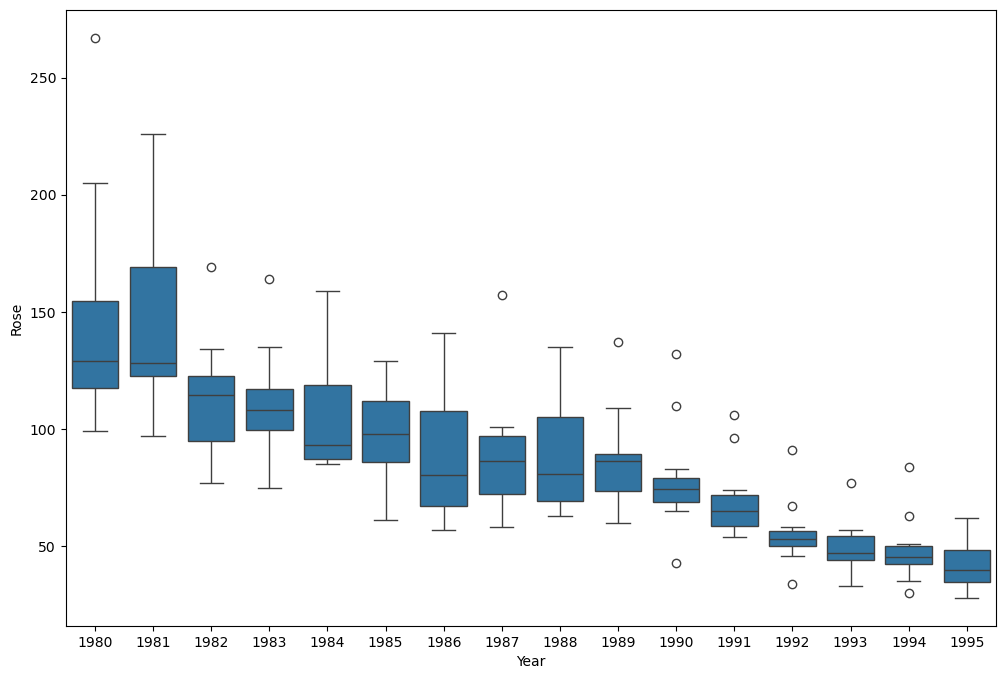

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_copy.index.year, y= df_copy["Rose"])
plt.xlabel("Year")

Text(0.5, 0, 'Month')

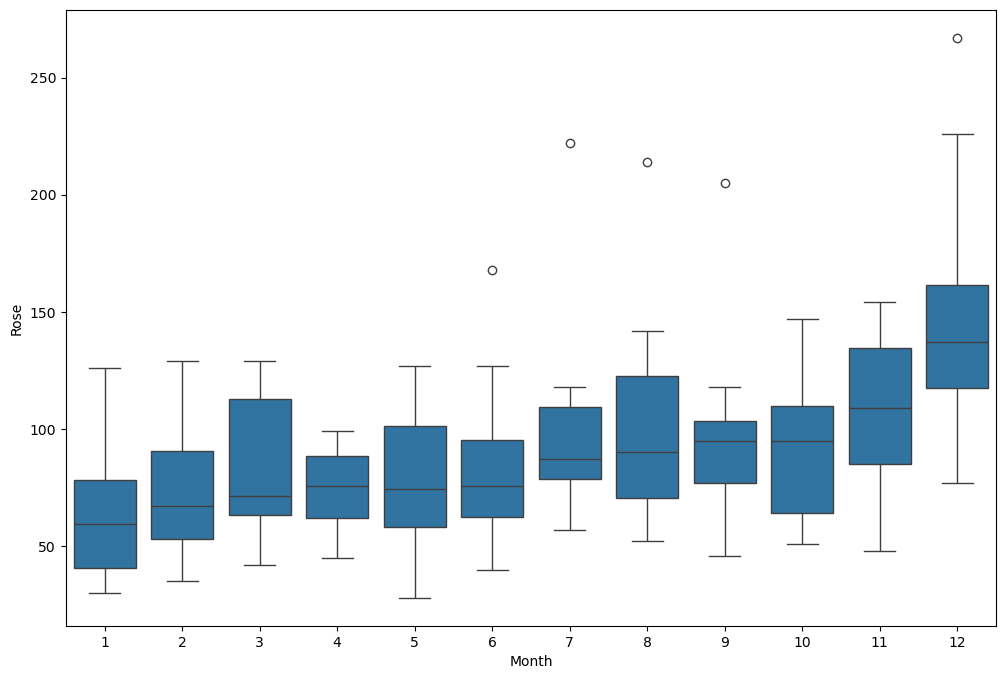

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_copy.index.month, y= df_copy["Rose"])
plt.xlabel("Month")

In [17]:
import calendar
df_copy['Month'] = df_copy.index.month
df_copy['Month'] = df_copy['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
df_copy['Year'] = df_copy.index.year

In [18]:
df_copy_pivot=pd.pivot_table(df_copy, columns= "Year", index="Month")
df_copy_pivot=df_copy_pivot.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
df_copy_pivot

Rose                                                                 \
Year    1980   1981   1982   1983   1984   1985   1986   1987   1988   1989   
Month                                                                         
Jan    112.0  126.0   89.0   75.0   88.0   61.0   57.0   58.0   63.0   71.0   
Feb    118.0  129.0   77.0  108.0   85.0   82.0   65.0   65.0  115.0   60.0   
Mar    129.0  124.0   82.0  115.0  112.0  124.0   67.0   70.0   70.0   89.0   
Apr     99.0   97.0   97.0   85.0   87.0   93.0   71.0   86.0   66.0   74.0   
May    116.0  102.0  127.0  101.0   91.0  108.0   76.0   93.0   67.0   73.0   
Jun    168.0  127.0  121.0  108.0   87.0   75.0   67.0   74.0   83.0   91.0   
Jul    118.0  222.0  117.0  109.0   87.0   87.0  110.0   87.0   79.0   86.0   
Aug    129.0  214.0  117.0  124.0  142.0  103.0  118.0   73.0   77.0   74.0   
Sep    205.0  118.0  106.0  105.0   95.0   90.0   99.0  101.0  102.0   87.0   
Oct    147.0  141.0  112.0   95.0  108.0  108.0   85.0  100.0  116.0   87.0   
Nov    150.0  154.0  134.0  135.0  139.0  123.0  107.0   96.0  100.0  109.0   
Dec    267.0  226.0  169.0  164.0  159.0  129.0  141.0  157.0  135.0  137.0   

                                             
Year    1990   1991  1992  1993  1994  1995  
Month                                        
Jan     43.0   54.0  34.0  33.0  30.0  30.0  
Feb     69.0   55.0  47.0  40.0  35.0  39.0  
Mar     73.0   66.0  56.0  46.0  42.0  45.0  
Apr     77.0   65.0  53.0  45.0  48.0  52.0  
May     69.0   60.0  53.0  41.0  44.0  28.0  
Jun     76.0   65.0  55.0  55.0  45.0  40.0  
Jul     78.0   96.0  67.0  57.0   NaN  62.0  
Aug     70.0   55.0  52.0  54.0   NaN   NaN  
Sep     83.0   71.0  46.0  46.0  46.0   NaN  
Oct     65.0   63.0  51.0  52.0  51.0   NaN  
Nov    110.0   74.0  58.0  48.0  63.0   NaN  
Dec    132.0  106.0  91.0  77.0  84.0   NaN

<Axes: xlabel='Month'>

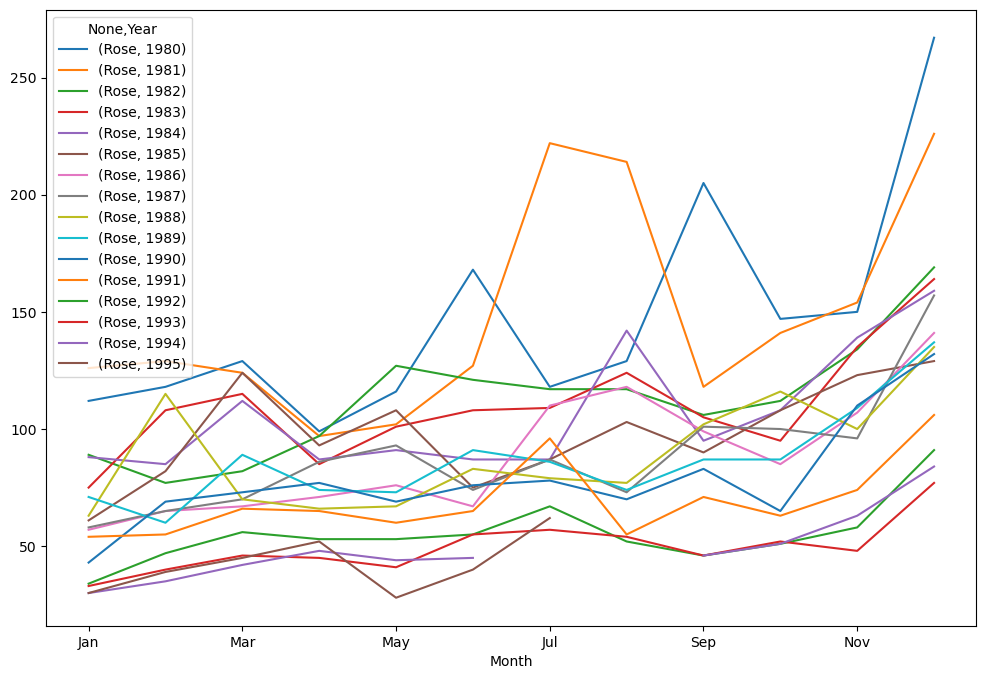

In [19]:
df_copy_pivot.plot(figsize=(12,8))

In [20]:
df_copy_pivot_year=pd.pivot_table(df_copy, columns= "Month", index="Year")
df_copy_pivot_year

Rose                                                                 \
Month   Apr    Aug    Dec    Feb    Jan    Jul    Jun    Mar    May    Nov   
Year                                                                         
1980   99.0  129.0  267.0  118.0  112.0  118.0  168.0  129.0  116.0  150.0   
1981   97.0  214.0  226.0  129.0  126.0  222.0  127.0  124.0  102.0  154.0   
1982   97.0  117.0  169.0   77.0   89.0  117.0  121.0   82.0  127.0  134.0   
1983   85.0  124.0  164.0  108.0   75.0  109.0  108.0  115.0  101.0  135.0   
1984   87.0  142.0  159.0   85.0   88.0   87.0   87.0  112.0   91.0  139.0   
1985   93.0  103.0  129.0   82.0   61.0   87.0   75.0  124.0  108.0  123.0   
1986   71.0  118.0  141.0   65.0   57.0  110.0   67.0   67.0   76.0  107.0   
1987   86.0   73.0  157.0   65.0   58.0   87.0   74.0   70.0   93.0   96.0   
1988   66.0   77.0  135.0  115.0   63.0   79.0   83.0   70.0   67.0  100.0   
1989   74.0   74.0  137.0   60.0   71.0   86.0   91.0   89.0   73.0  109.0   
1990   77.0   70.0  132.0   69.0   43.0   78.0   76.0   73.0   69.0  110.0   
1991   65.0   55.0  106.0   55.0   54.0   96.0   65.0   66.0   60.0   74.0   
1992   53.0   52.0   91.0   47.0   34.0   67.0   55.0   56.0   53.0   58.0   
1993   45.0   54.0   77.0   40.0   33.0   57.0   55.0   46.0   41.0   48.0   
1994   48.0    NaN   84.0   35.0   30.0    NaN   45.0   42.0   44.0   63.0   
1995   52.0    NaN    NaN   39.0   30.0   62.0   40.0   45.0   28.0    NaN   

                     
Month    Oct    Sep  
Year                 
1980   147.0  205.0  
1981   141.0  118.0  
1982   112.0  106.0  
1983    95.0  105.0  
1984   108.0   95.0  
1985   108.0   90.0  
1986    85.0   99.0  
1987   100.0  101.0  
1988   116.0  102.0  
1989    87.0   87.0  
1990    65.0   83.0  
1991    63.0   71.0  
1992    51.0   46.0  
1993    52.0   46.0  
1994    51.0   46.0  
1995     NaN    NaN

<Axes: xlabel='Year'>

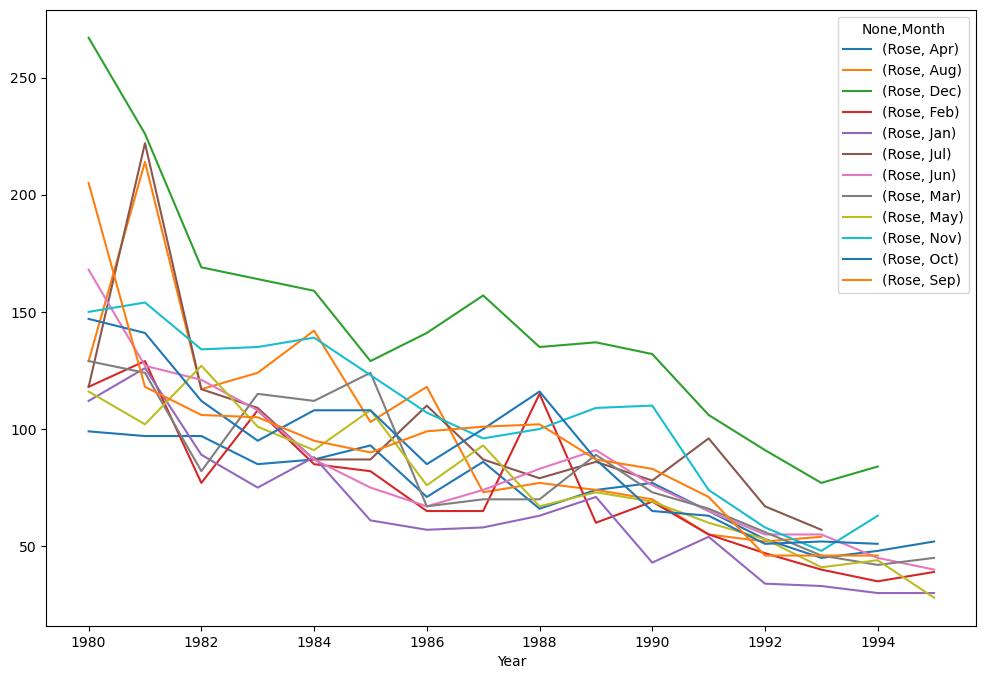

In [21]:
df_copy_pivot_year.plot(figsize=(12,8))

In [22]:
df_copy["Rose"]=df_copy["Rose"].interpolate(method="spline",order=2)

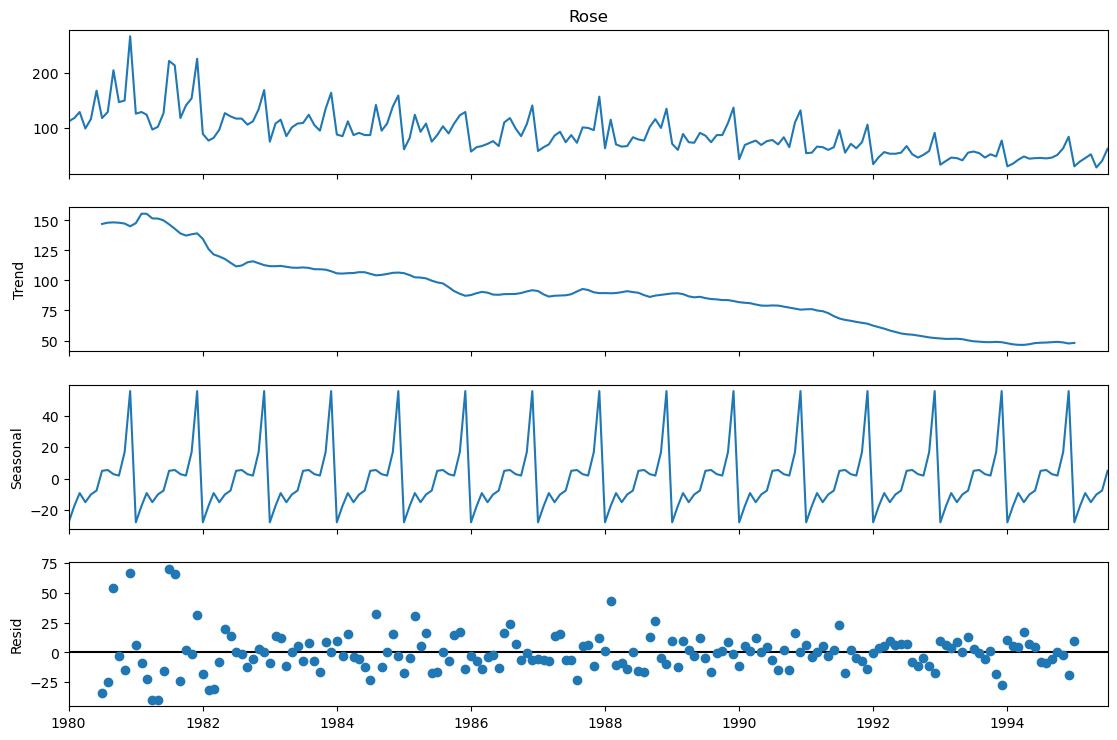

In [23]:
decompose=sm.tsa.seasonal_decompose(df_copy["Rose"], model="additive")
fig=decompose.plot()
fig.set_figwidth(12)
fig.set_figheight(8)

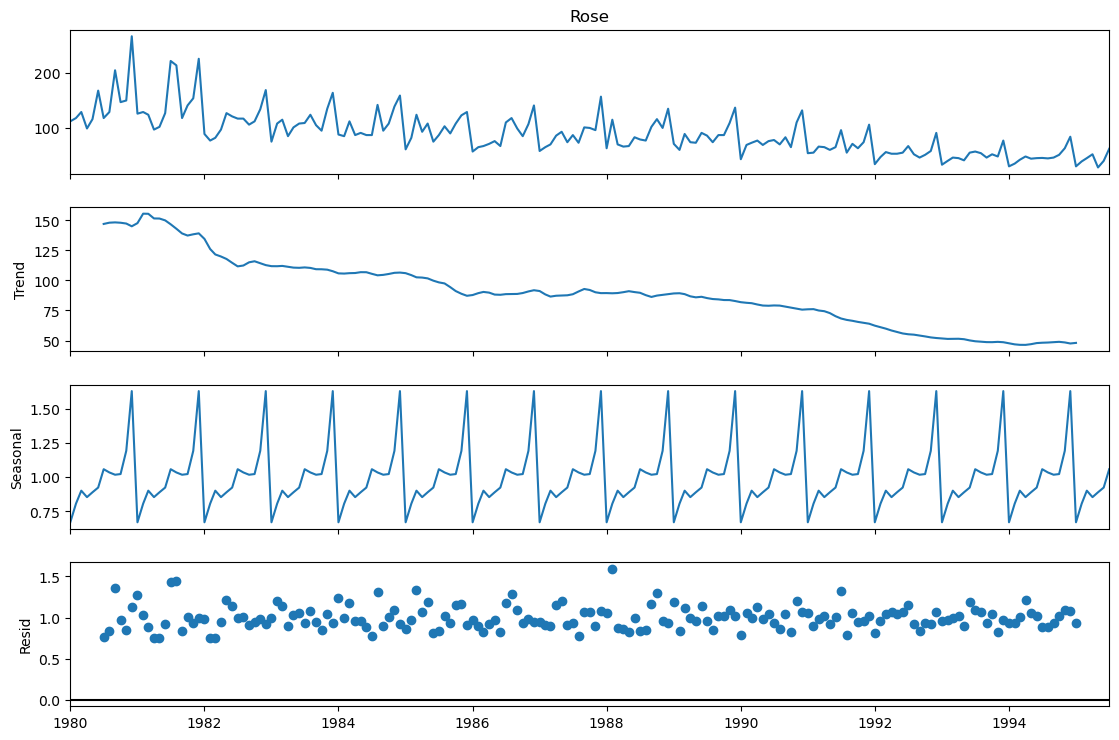

In [24]:
decompose=sm.tsa.seasonal_decompose(df_copy["Rose"], model="multiplicative")
fig=decompose.plot()
fig.set_figwidth(12)
fig.set_figheight(8)

In [25]:
train = df_copy.iloc[0:int(len(df_copy) * 0.8)]
test = df_copy.iloc[int(len(df_copy) * 0.8):]

In [26]:
train.shape

(149, 3)

In [27]:
test.shape

(38, 3)

In [28]:
train_time= [i+1 for i in range(len(train))]
test_time=[i+150 for i in range(len(test))]

In [29]:
LinearRegressionTrain=train.copy()
LinearRegressionTest=test.copy()

In [30]:
LinearRegressionTrain["time"]=train_time
LinearRegressionTest["time"]=test_time

In [31]:
lr=LinearRegression()
lr.fit(LinearRegressionTrain[["time"]],LinearRegressionTrain["Rose"])

LinearRegression()

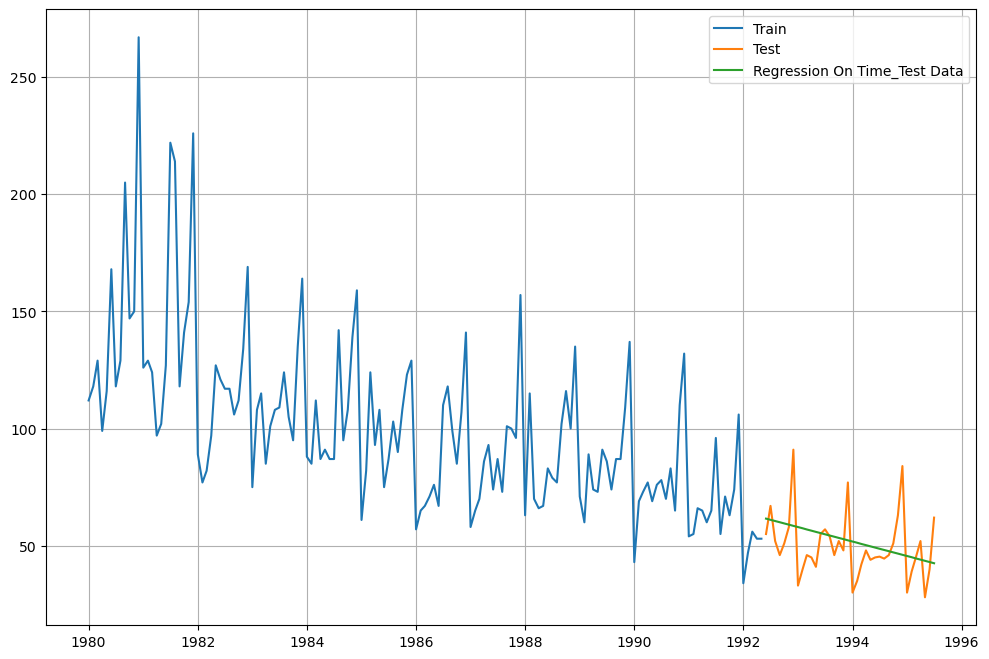

In [32]:
LinearRegressionTest['Predicted_Sales'] = lr.predict(LinearRegressionTest[["time"]])
plt.figure(figsize=(12,8))
plt.plot( LinearRegressionTrain['Rose'], label='Train')
plt.plot(LinearRegressionTest['Rose'], label='Test')
plt.plot(LinearRegressionTest['Predicted_Sales'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [33]:
rmse_linear=metrics.mean_squared_error(LinearRegressionTest['Rose'],LinearRegressionTest['Predicted_Sales'],squared=False)
rmse_linear

13.737466768155157

In [139]:
Model_Performance = pd.DataFrame({'Test RMSE': [rmse_linear]},index=['Linear Regression'])
Model_Performance

,Test RMSE
Linear Regression,13.737467


In [35]:
SimpleAverageTrain= train.copy()
SimpleAverageTest= test.copy()

In [36]:
SimpleAverageTest["Sales_Avg"]=SimpleAverageTrain["Rose"].mean()

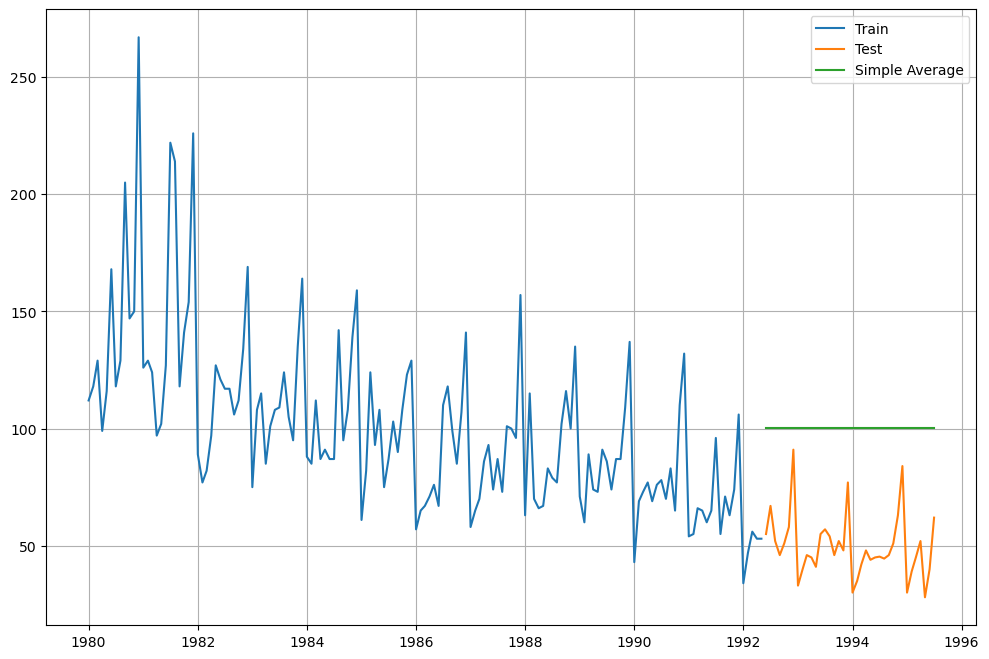

In [37]:
plt.figure(figsize=(12,8))
plt.plot( SimpleAverageTrain['Rose'], label='Train')
plt.plot(SimpleAverageTest['Rose'], label='Test')
plt.plot(SimpleAverageTest['Sales_Avg'], label='Simple Average')

plt.legend(loc='best')
plt.grid();

In [38]:
rmse_simpleaverage=metrics.mean_squared_error(SimpleAverageTest['Rose'],SimpleAverageTest['Sales_Avg'],squared=False)
rmse_simpleaverage

52.24342072218599

In [141]:
new_row =pd.DataFrame({'Test RMSE': [rmse_simpleaverage]},index=['Simple Average'])
Model_Performance = pd.concat([Model_Performance, new_row])
Model_Performance

,Test RMSE
Linear Regression,13.737467
Simple Average,52.243421


In [40]:
MovingAverage= df_copy.copy()

In [105]:
MovingAverage['Trailing_3'] = MovingAverage['Rose'].rolling(3).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

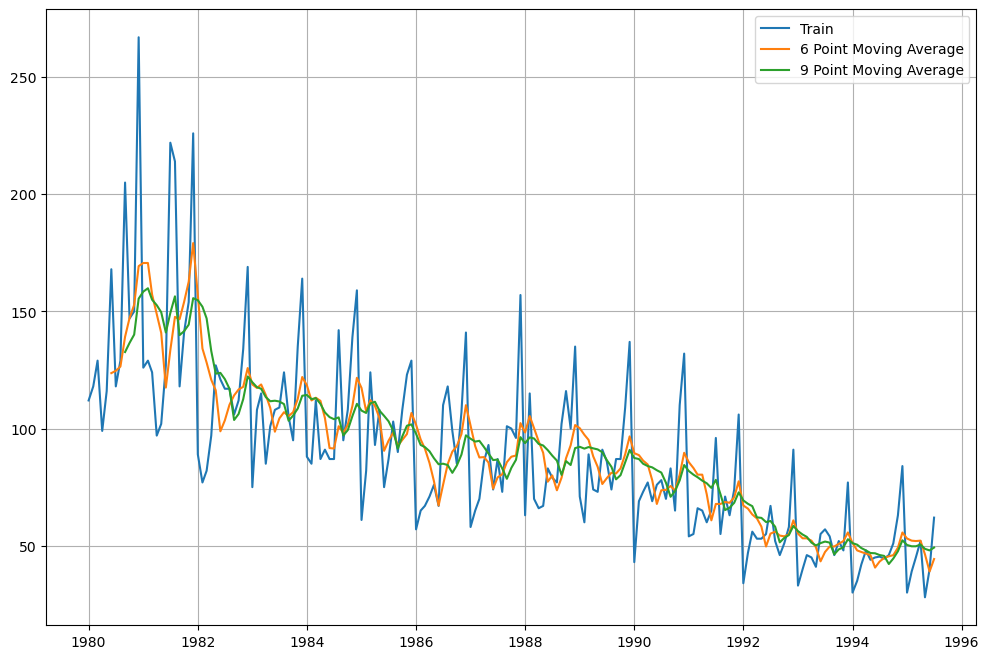

In [42]:
## Plotting on the whole data
plt.figure(figsize=(12,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [107]:
MovingAverage_train= MovingAverage[0:int(len(MovingAverage)*0.8)]
MovingAverage_test= MovingAverage[int(len(MovingAverage)*0.8) :]

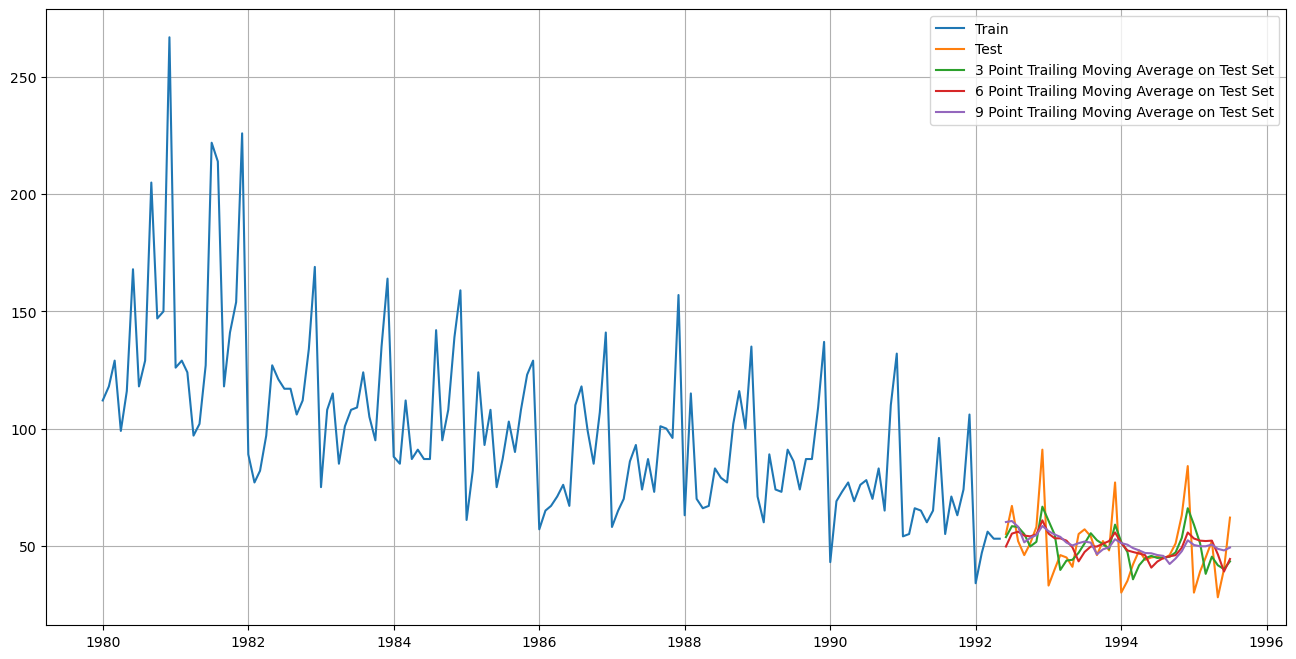

In [109]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Rose'], label='Train')
plt.plot(MovingAverage_test['Rose'], label='Test')
plt.plot(MovingAverage_test['Trailing_3'],label = '3 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

In [111]:
rmse_model4_test_3 = metrics.mean_squared_error(MovingAverage_test['Rose'],MovingAverage_test['Trailing_3'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))

rmse_model4_test_6 = metrics.mean_squared_error(MovingAverage_test['Rose'],MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

rmse_model4_test_9 = metrics.mean_squared_error(MovingAverage_test['Rose'],MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 6 point Moving Average Model forecast on the Training Data,  RMSE is 11.559
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 12.413
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 12.622


In [143]:
new_row3 =pd.DataFrame({'Test RMSE': [rmse_model4_test_3]},index=['Moving Average Trailing 3'])
new_row1 =pd.DataFrame({'Test RMSE': [rmse_model4_test_6]},index=['Moving Average Trailing 6'])
new_row2 =pd.DataFrame({'Test RMSE': [rmse_model4_test_9]},index=['Moving Average Trailing 9'])
Model_Performance = pd.concat([Model_Performance, new_row3, new_row1, new_row2 ])
Model_Performance

,Test RMSE
Linear Regression,13.737467
Simple Average,52.243421
Moving Average Trailing 3,11.558671
Moving Average Trailing 6,12.412717
Moving Average Trailing 9,12.621759


In [121]:
result= pd.DataFrame({'Alpha':[],'Test RMSE': []})
for i in np.arange(0.01,1,0.01):
    simple=SimpleExpSmoothing(train["Rose"])
    simple=simple.fit(smoothing_level=i,optimized=False)
    test[f"SalesPredict_{i}"]=simple.forecast(steps=len(test))
    rmse_simple=metrics.mean_squared_error(test["Rose"],test[f"SalesPredict_{i}"],squared=False)
    temp_result = pd.DataFrame({"Alpha": [i], "Test RMSE": [rmse_simple]})
    
    # Concatenate the temporary result with the main result DataFrame
    result = pd.concat([result, temp_result], ignore_index=True)

In [125]:
result.sort_values(by="Test RMSE",ascending=True)

,Alpha,Test RMSE
6,0.07,36.459396
7,0.08,36.486588
5,0.06,36.604090
8,0.09,36.627739
9,0.10,36.851649
...,...,...
94,0.95,78.555270
95,0.96,78.809453
96,0.97,79.055251
97,0.98,79.292564


In [127]:
simple=SimpleExpSmoothing(train["Rose"])
simple=simple.fit(smoothing_level=0.07,optimized=False)
test["Predicted_Sales"]=simple.forecast(steps=len(test))

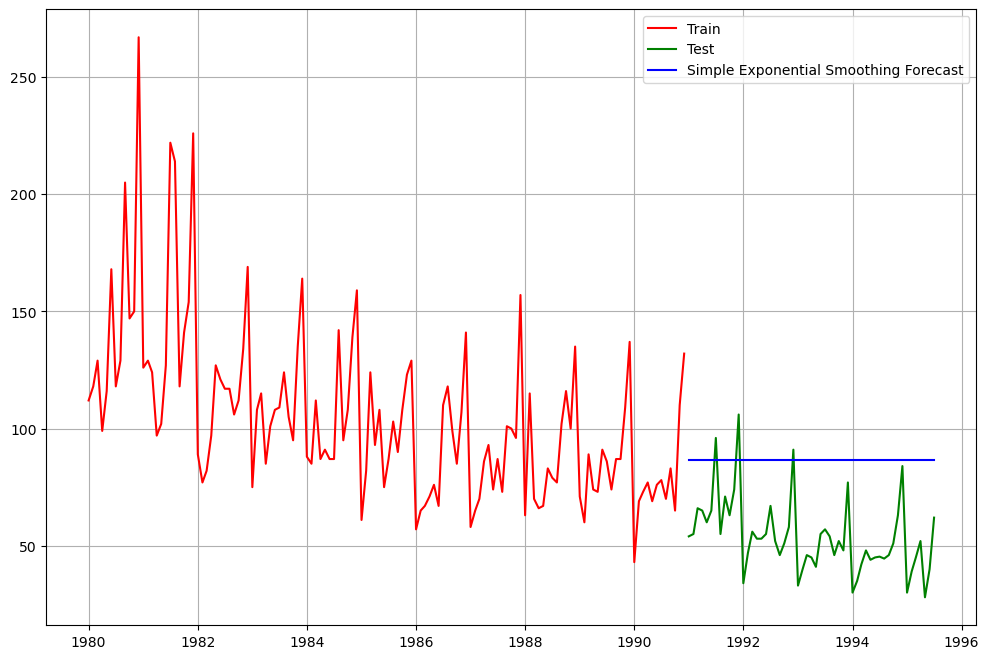

In [129]:
plt.figure(figsize=(12,8))
plt.plot(train["Rose"], color="Red", label="Train")
plt.plot(test["Rose"], color="Green", label="Test")
plt.plot(test["Predicted_Sales"], color="Blue", label="Simple Exponential Smoothing Forecast")
plt.legend(loc = 'best')
plt.grid();

In [145]:
new_row4 =pd.DataFrame({'Test RMSE': [result["Test RMSE"].sort_values(ascending=True).iloc[0]]},index=['Simple Exponential Smoothing'])
Model_Performance = pd.concat([Model_Performance, new_row4])
Model_Performance

,Test RMSE
Linear Regression,13.737467
Simple Average,52.243421
Moving Average Trailing 3,11.558671
Moving Average Trailing 6,12.412717
Moving Average Trailing 9,12.621759
Simple Exponential Smoothing,36.459396


In [131]:
result1= pd.DataFrame({'Alpha':[], 'Beta':[],'Test RMSE': []})
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
         double=Holt(train["Rose"])
         double=double.fit(smoothing_level=i,smoothing_trend=j,optimized=False)
         test[f"Predict_{i}{j}"]=double.forecast(steps=len(test))
         rmse_double=metrics.mean_squared_error(test["Rose"],test[f"Predict_{i}{j}"],squared=False)
         temp_result = pd.DataFrame({"Alpha": [i], "Beta" : [j], "Test RMSE": [rmse_double]})
    
    # Concatenate the temporary result with the main result DataFrame
         result1 = pd.concat([result1, temp_result], ignore_index=True) 

In [133]:
result1.sort_values(by="Test RMSE",ascending=True)

,Alpha,Beta,Test RMSE
343,0.04,0.47,14.566308
222,0.03,0.25,14.687964
262,0.03,0.65,14.718774
300,0.04,0.04,14.891774
342,0.04,0.46,14.903617
...,...,...,...
6731,0.68,0.99,1118.356907
7127,0.72,0.99,1118.492372
6830,0.69,0.99,1119.123986
7028,0.71,0.99,1119.207524


In [135]:
double=Holt(train["Rose"])
double=double.fit(smoothing_level=0.04,smoothing_trend=0.47,optimized=True)
test["PredictedSales_double"]=double.forecast(steps=len(test))

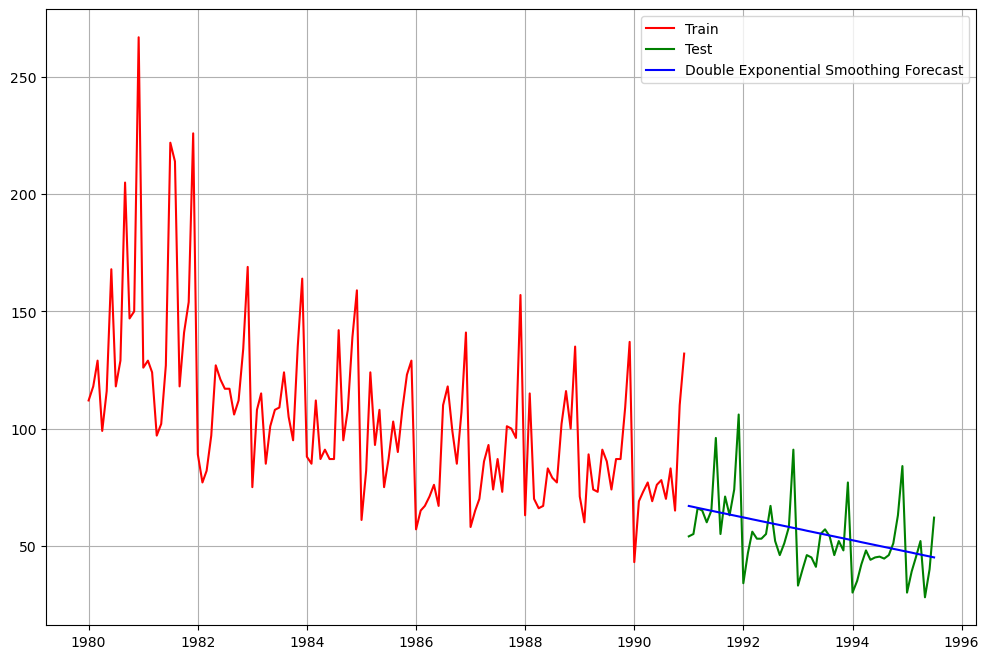

In [137]:
plt.figure(figsize=(12,8))
plt.plot(train["Rose"], color="Red", label="Train")
plt.plot(test["Rose"], color="Green", label="Test")
plt.plot(test["PredictedSales_double"], color="Blue", label="Double Exponential Smoothing Forecast")
plt.legend(loc = 'best')
plt.grid();

In [149]:
new_row5 =pd.DataFrame({'Test RMSE': [result1["Test RMSE"].sort_values(ascending=True).iloc[0]]},index=['Double Exponential Smoothing'])
Model_Performance = pd.concat([Model_Performance, new_row5])
Model_Performance

,Test RMSE
Linear Regression,13.737467
Simple Average,52.243421
Moving Average Trailing 3,11.558671
Moving Average Trailing 6,12.412717
Moving Average Trailing 9,12.621759
Simple Exponential Smoothing,36.459396
Double Exponential Smoothing,36.459396
Double Exponential Smoothing,14.566308


In [159]:
result2= pd.DataFrame({'Alpha':[], 'Beta':[],'Gamma':[],'Test RMSE': []})
for i in np.arange(0.01,1,0.1):
    for j in np.arange(0.01,1,0.1):
        for k in np.arange(0.01,1,0.1):
             triple=ExponentialSmoothing(train["Rose"],seasonal="additive")
             triple=triple.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False)
             test[f"Predict_{i}{j}{k}"]=triple.forecast(steps=len(test))
             rmse_triple=metrics.mean_squared_error(test["Rose"],test[f"Predict_{i}{j}{k}"],squared=False)
             temp_result = pd.DataFrame({"Alpha": [i], "Beta" : [j], "Gamma": [k],"Test RMSE": [rmse_triple]})
    
    # Concatenate the temporary result with the main result DataFrame
             result2 = pd.concat([result2, temp_result], ignore_index=True)

In [161]:
result2.sort_values(by="Test RMSE",ascending=True)

,Alpha,Beta,Gamma,Test RMSE
980,0.91,0.81,0.01,19.887833
900,0.91,0.01,0.01,19.887833
910,0.91,0.11,0.01,19.887833
930,0.91,0.31,0.01,19.887833
940,0.91,0.41,0.01,19.887833
...,...,...,...,...
939,0.91,0.31,0.91,57.900806
949,0.91,0.41,0.91,57.900806
959,0.91,0.51,0.91,57.900806
979,0.91,0.71,0.91,57.900806


In [163]:
triple=ExponentialSmoothing(train["Rose"],seasonal="additive")
triple=triple.fit(smoothing_level=0.91,smoothing_trend=0.81,smoothing_seasonal=0.01,optimized=True)
test["PredictedSales_triple"]=triple.forecast(steps=len(test))

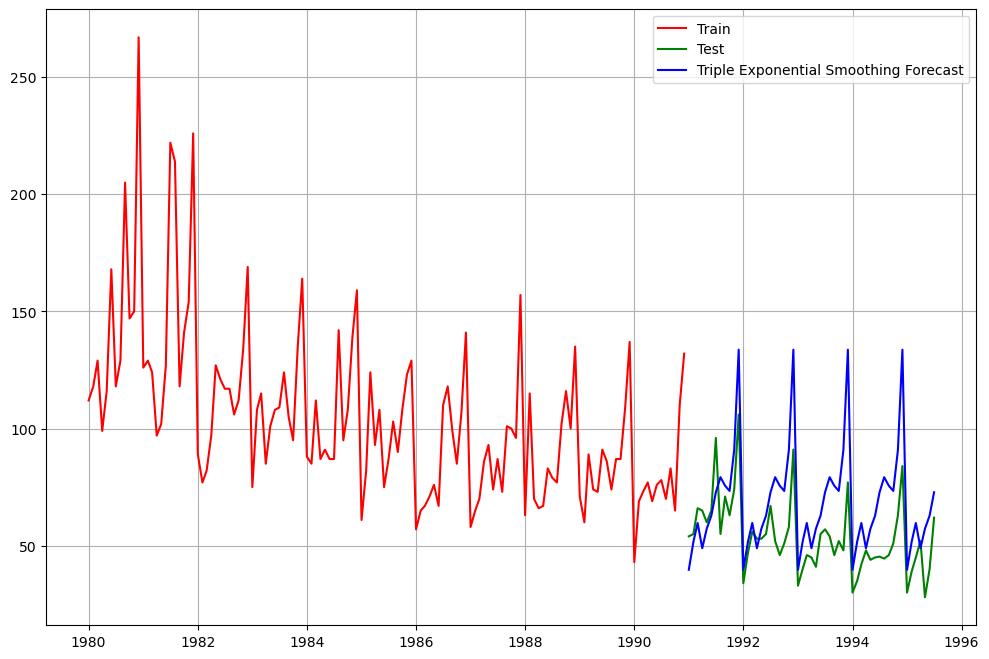

In [165]:
plt.figure(figsize=(12,8))
plt.plot(train["Rose"], color="Red", label="Train")
plt.plot(test["Rose"], color="Green", label="Test")
plt.plot(test["PredictedSales_triple"], color="Blue", label="Triple Exponential Smoothing Forecast")
plt.legend(loc = 'best')
plt.grid();

In [167]:
new_row6 =pd.DataFrame({'Test RMSE': [result2["Test RMSE"].sort_values(ascending=True).iloc[0]]},index=['Triple Exponential Smoothing'])
Model_Performance = pd.concat([Model_Performance, new_row6])
Model_Performance

,Test RMSE
Linear Regression,13.737467
Simple Average,52.243421
Moving Average Trailing 3,11.558671
Moving Average Trailing 6,12.412717
Moving Average Trailing 9,12.621759
Simple Exponential Smoothing,36.459396
Double Exponential Smoothing,36.459396
Double Exponential Smoothing,14.566308
Triple Exponential Smoothing,19.887833


In [62]:
Model_Performance=Model_Performance[~Model_Performance.index.duplicated(keep="first")]
Model_Performance

,Test RMSE
Linear Regression,13.737467
Simple Average,52.243421
Moving Average Trailing 6,12.412717
Moving Average Trailing 9,12.621759
Simple Exponential Smoothing,13.836108
Double Exponential Smoothing,13.836108
Triple Exponential Smoothing,13.840197


In [169]:
dftest = adfuller(df_copy["Rose"])#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.873
DF test p-value is 0.3447


As p-value is greater than 0.05, we fail to reject Null Hypothesis which means data is non-stationary

Text(0, 0.5, 'Sales')

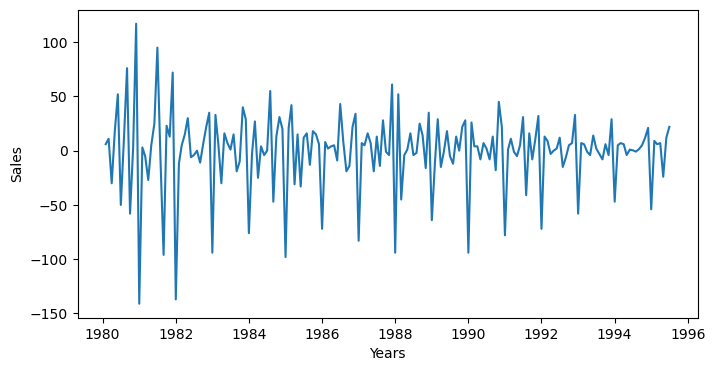

In [65]:
plt.figure(figsize=(8, 4))
plt.plot(df_copy["Rose"].diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sales')

In [66]:
dftest = adfuller(df_copy["Rose"].diff(periods=1).dropna())#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -8.044
DF test p-value is 0.0000


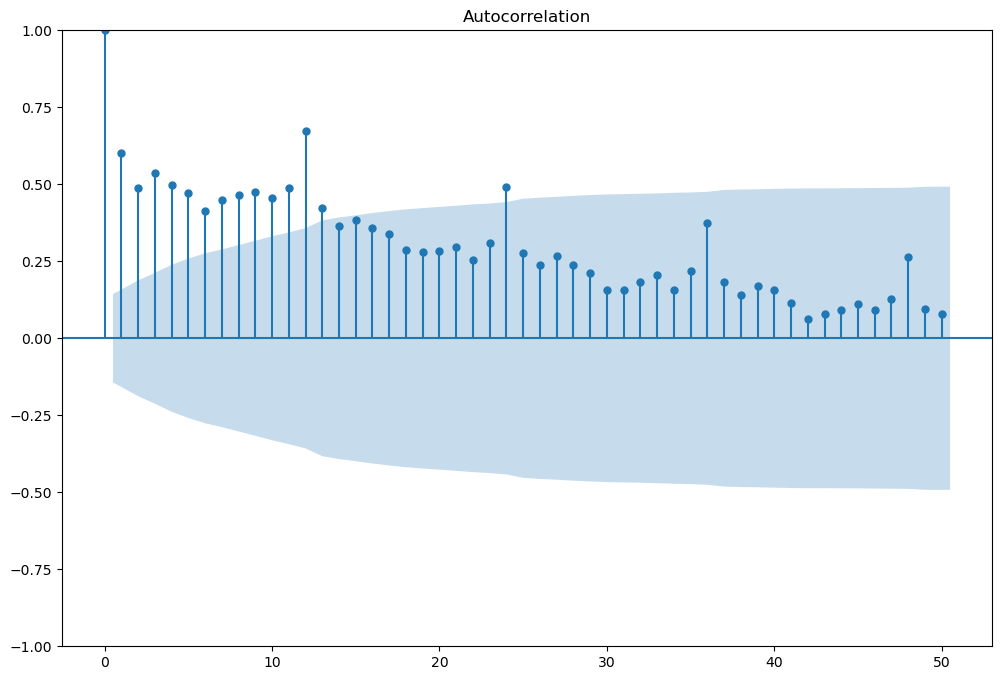

In [171]:
plt.figure(figsize=(12,8))
plot_acf(df_copy["Rose"],lags=50,  ax=plt.gca())
plt.show()

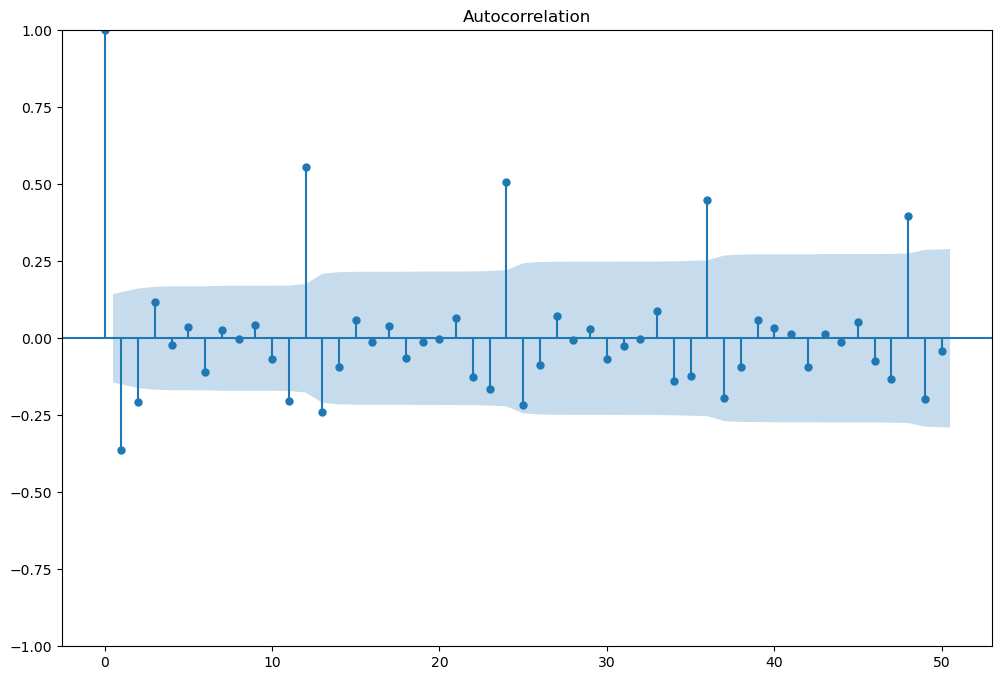

In [173]:
plt.figure(figsize=(12,8))
plot_acf(df_copy["Rose"].diff(1).dropna(),lags=50,  ax=plt.gca())
plt.show()

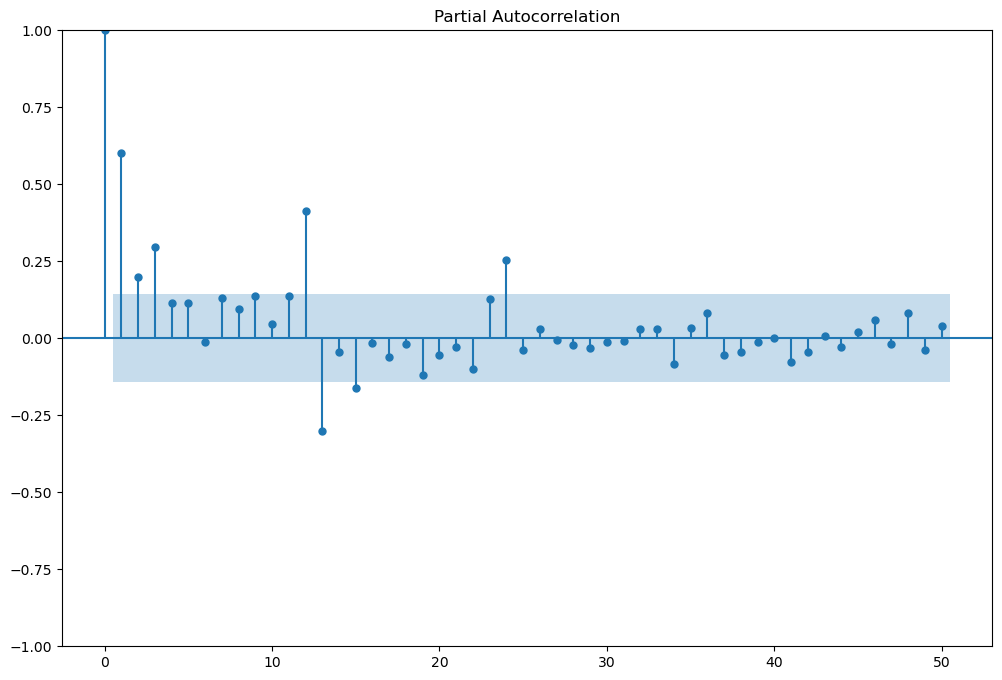

In [175]:
plt.figure(figsize=(12,8))
plot_pacf(df_copy["Rose"],lags=50,  ax=plt.gca())
plt.show()

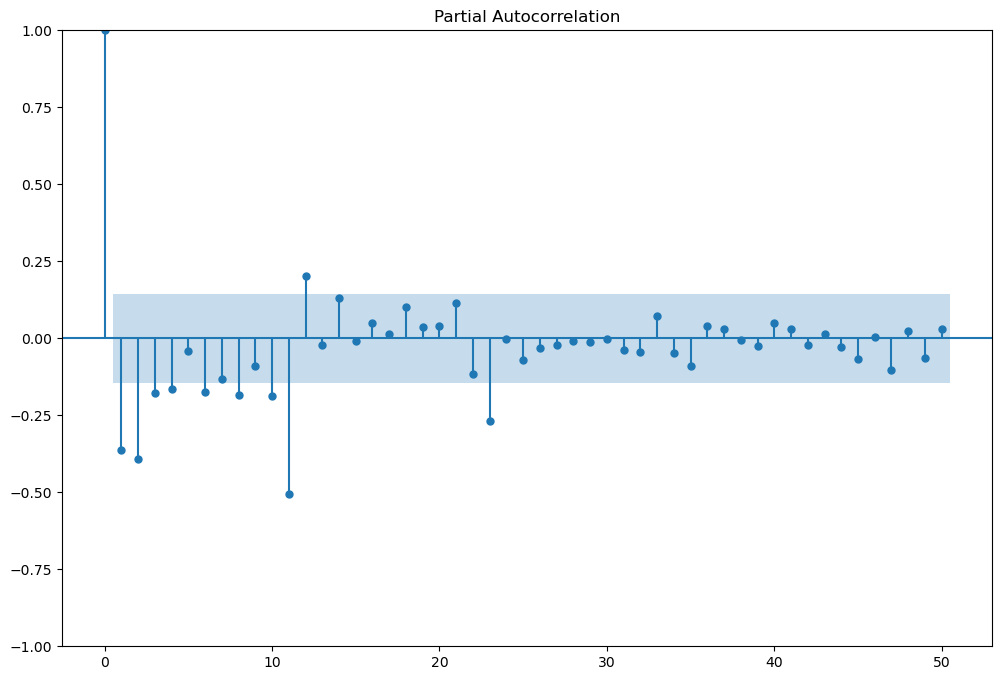

In [177]:
plt.figure(figsize=(12,8))
plot_pacf(df_copy["Rose"].diff(1).dropna(),lags=50,  ax=plt.gca())
plt.show()

In [179]:
train=df_copy[df_copy['Year'] <1991]
test=df_copy[df_copy['Year'] >=1991]

In [70]:
train.shape

(132, 3)

In [71]:
test.shape

(55, 3)

In [191]:
manual_ARIMA = ARIMA(train['Rose'], order=(4,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -635.859
Date:                Sun, 15 Sep 2024   AIC                           1285.718
Time:                        21:45:21   BIC                           1305.845
Sample:                    01-01-1980   HQIC                          1293.896
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3838      0.923     -0.416      0.677      -2.192       1.425
ar.L2          0.0046      0.258      0.018      0.986      -0.502       0.511
ar.L3          0.0414      0.113      0.366      0.7

In [193]:
test["predicted_manual_ARIMA"] = results_manual_ARIMA.forecast(steps=len(test))

In [195]:
rmse_manual_arima = metrics.mean_squared_error(test['Rose'],test["predicted_manual_ARIMA"],squared=False)
new_row8 = pd.DataFrame({'Test RMSE': [rmse_manual_arima]}
                           ,index=['Manual ARIMA(4,1,2)'])


Model_Performance = pd.concat([Model_Performance,new_row8])
Model_Performance

,Test RMSE
Linear Regression,13.737467
Simple Average,52.243421
Moving Average Trailing 3,11.558671
Moving Average Trailing 6,12.412717
Moving Average Trailing 9,12.621759
Simple Exponential Smoothing,36.459396
Double Exponential Smoothing,36.459396
Double Exponential Smoothing,14.566308
Triple Exponential Smoothing,19.887833
"Manual ARIMA(4,1,2)",37.061202


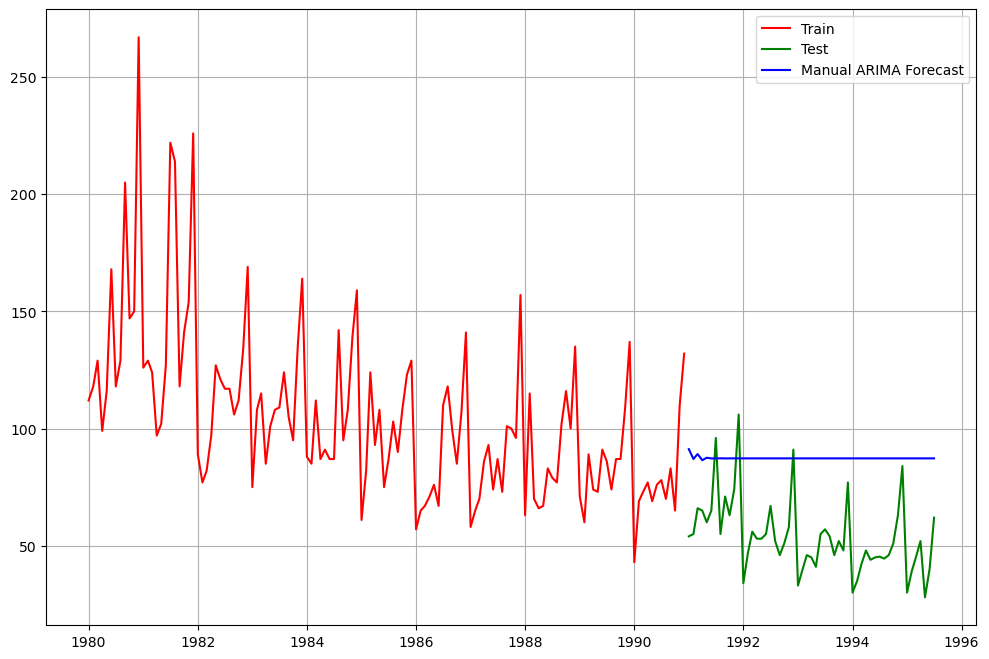

In [197]:
plt.figure(figsize=(12,8))
plt.plot(train["Rose"], color="Red", label="Train")
plt.plot(test["Rose"], color="Green", label="Test")
plt.plot(test["predicted_manual_ARIMA"], color="Blue", label="Manual ARIMA Forecast")
plt.legend(loc = 'best')
plt.grid();

In [215]:
import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [217]:
# Creating an empty Dataframe with column names only
ARIMA_AIC1 = pd.DataFrame(columns=['param', 'AIC'])
print(ARIMA_AIC1)

Empty DataFrame
Columns: [param, AIC]
Index: []


In [219]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_auto_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_auto_model.aic))
    ARIMA_AIC1.loc[len(ARIMA_AIC1)] = {'param':param, 'AIC': ARIMA_auto_model.aic}

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748333
ARIMA(0, 1, 2) - AIC:1279.6715288535802
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(0, 1, 4) - AIC:1281.6766982143945
ARIMA(1, 1, 0) - AIC:1317.3503105381546
ARIMA(1, 1, 1) - AIC:1280.5742295380055
ARIMA(1, 1, 2) - AIC:1279.8707234231933
ARIMA(1, 1, 3) - AIC:1281.8707223309975
ARIMA(1, 1, 4) - AIC:1279.6052660805917
ARIMA(2, 1, 0) - AIC:1298.6110341604983
ARIMA(2, 1, 1) - AIC:1281.5078621868515
ARIMA(2, 1, 2) - AIC:1281.8707222264593
ARIMA(2, 1, 3) - AIC:1274.695124758913
ARIMA(2, 1, 4) - AIC:1278.7711242154592
ARIMA(3, 1, 0) - AIC:1297.4810917271698
ARIMA(3, 1, 1) - AIC:1282.4192776271952
ARIMA(3, 1, 2) - AIC:1283.720740597711
ARIMA(3, 1, 3) - AIC:1278.659276175651
ARIMA(3, 1, 4) - AIC:1287.7190768700912
ARIMA(4, 1, 0) - AIC:1296.3266569004472
ARIMA(4, 1, 1) - AIC:1283.7931715123077
ARIMA(4, 1, 2) - AIC:1285.718248563479
ARIMA(4, 1, 3) - AIC:1278.4514146222832
ARIMA(4, 1, 4) - AIC:1282.3383084889756


In [221]:
ARIMA_AIC1.sort_values(by='AIC',ascending=True)

,param,AIC
13,"(2, 1, 3)",1274.695125
23,"(4, 1, 3)",1278.451415
18,"(3, 1, 3)",1278.659276
14,"(2, 1, 4)",1278.771124
9,"(1, 1, 4)",1279.605266
2,"(0, 1, 2)",1279.671529
7,"(1, 1, 2)",1279.870723
3,"(0, 1, 3)",1280.545376
6,"(1, 1, 1)",1280.574230
11,"(2, 1, 1)",1281.507862


In [223]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3),freq='MS')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 15 Sep 2024   AIC                           1274.695
Time:                        21:56:17   BIC                           1291.946
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.039      0.000      -1.842      -1.514
ar.L2         -0.7287      0.084     -8.701      0.000      -0.893      -0.565
ma.L1          1.0445      0.630      1.657      0.0

In [225]:
test["predicted_auto_ARIMA"] = results_auto_ARIMA.forecast(steps=len(test))

In [229]:
rmse_arima = metrics.mean_squared_error(test['Rose'],test["predicted_auto_ARIMA"],squared=False)
new_row8 = pd.DataFrame({'Test RMSE': [rmse_arima]}
                           ,index=['Auto ARIMA(2,1,3)'])


Model_Performance = pd.concat([Model_Performance,new_row8])
Model_Performance

,Test RMSE
Linear Regression,13.737467
Simple Average,52.243421
Moving Average Trailing 3,11.558671
Moving Average Trailing 6,12.412717
Moving Average Trailing 9,12.621759
Simple Exponential Smoothing,36.459396
Double Exponential Smoothing,36.459396
Double Exponential Smoothing,14.566308
Triple Exponential Smoothing,19.887833
"Manual ARIMA(4,1,2)",37.061202


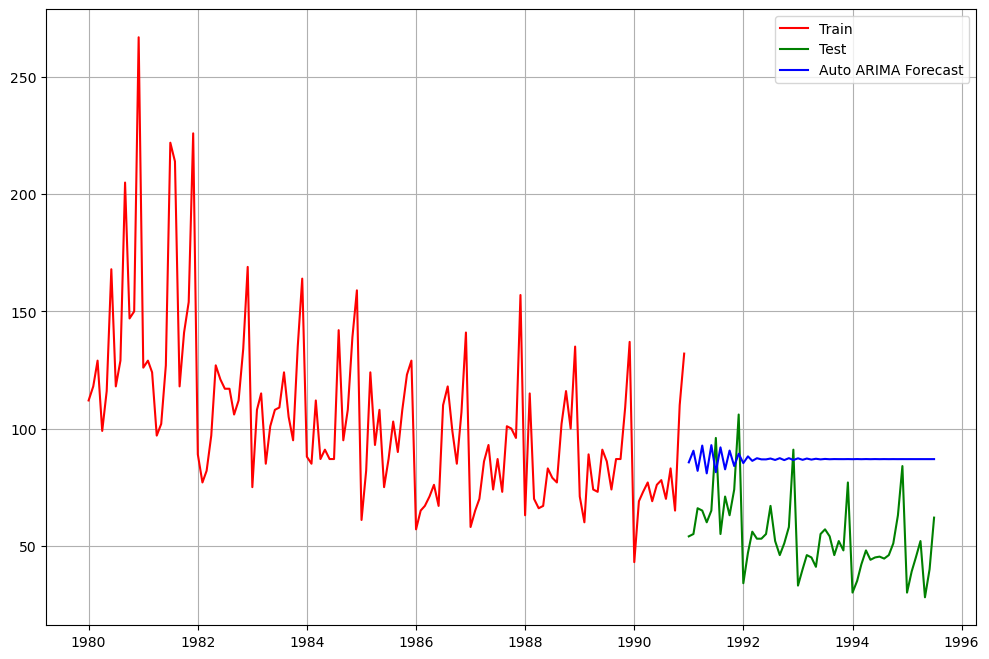

In [231]:
plt.figure(figsize=(12,8))
plt.plot(train["Rose"], color="Red", label="Train")
plt.plot(test["Rose"], color="Green", label="Test")
plt.plot(test["predicted_auto_ARIMA"], color="Blue", label="Auto ARIMA Forecast")
plt.legend(loc = 'best')
plt.grid();

Manual SARIMA

In [233]:
dftest = adfuller(df_copy["Rose"].diff(periods=12).dropna())#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -4.257
DF test p-value is 0.0005


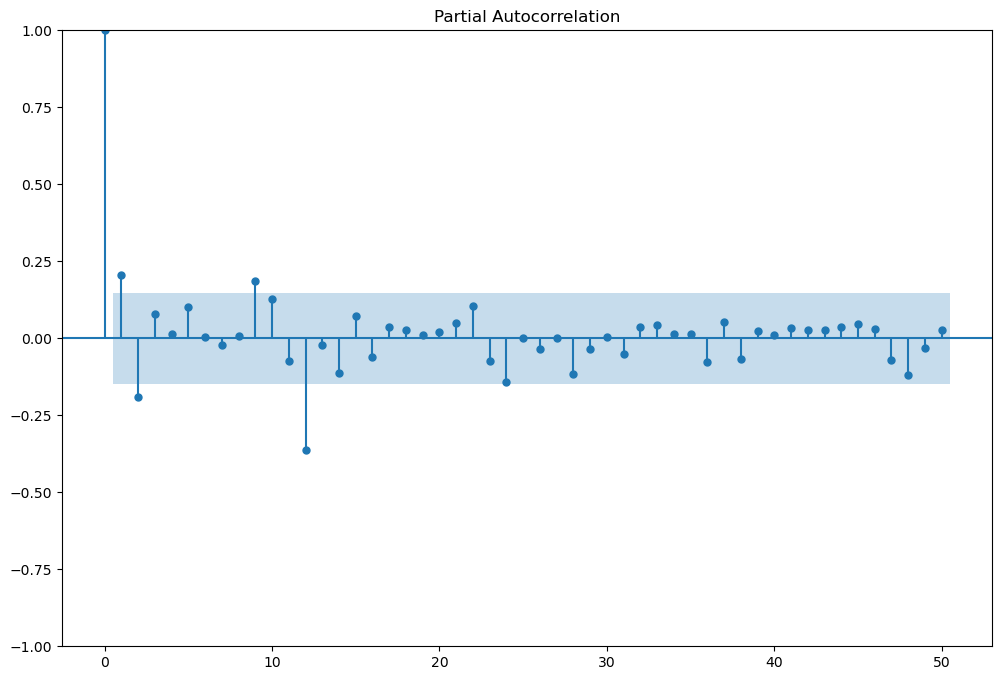

In [235]:
plt.figure(figsize=(12,8))
plot_pacf(df_copy["Rose"].diff(12).dropna(),lags=50,  ax=plt.gca())
plt.show()

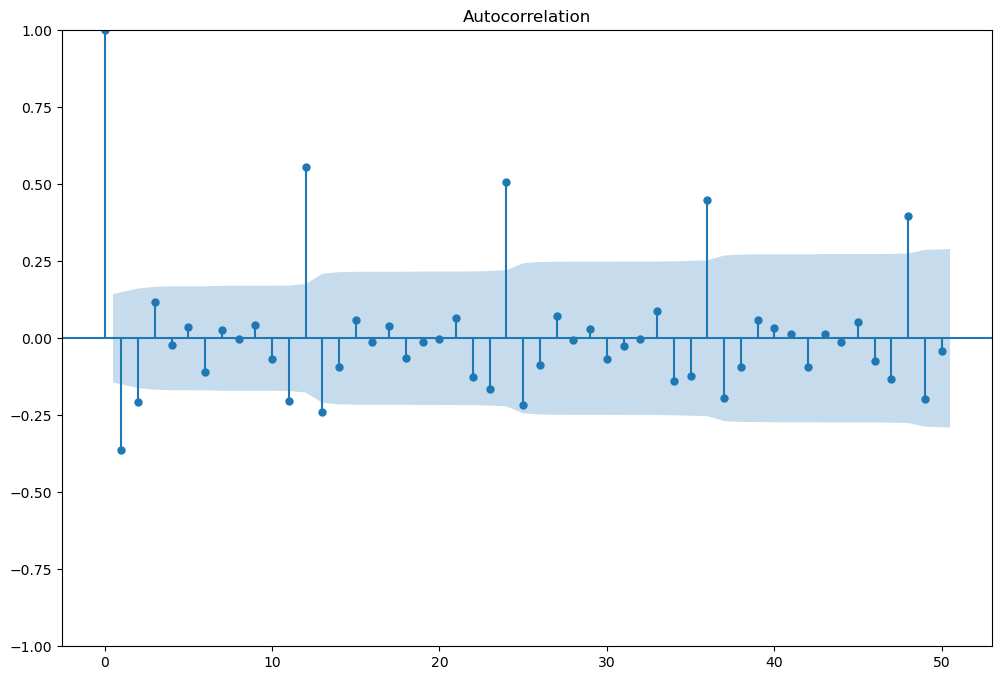

In [237]:
plt.figure(figsize=(12,8))
plot_acf(df_copy["Rose"].diff(1).dropna(),lags=50,  ax=plt.gca())
plt.show()

In [241]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -430.838
Date:                            Sun, 15 Sep 2024   AIC                            883.675
Time:                                    22:07:44   BIC                            912.657
Sample:                                         0   HQIC                           895.414
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7462      0.316     -2.364      0.018      -1.365      -0.128
ar.L2          0.0188      0.161   

In [243]:
test["predicted_manual_SARIMA_12"]=results_manual_SARIMA_12.forecast(steps=len(test))

In [245]:
rmse_manual_sarima = metrics.mean_squared_error(test['Rose'],test["predicted_manual_SARIMA_12"],squared=False)
new_row9 = pd.DataFrame({'Test RMSE': [rmse_manual_sarima]}
                           ,index=['SARIMA(4,1,2)(2,0,2,12)'])


Model_Performance = pd.concat([Model_Performance,new_row9])
Model_Performance

,Test RMSE
Linear Regression,13.737467
Simple Average,52.243421
Moving Average Trailing 3,11.558671
Moving Average Trailing 6,12.412717
Moving Average Trailing 9,12.621759
Simple Exponential Smoothing,36.459396
Double Exponential Smoothing,36.459396
Double Exponential Smoothing,14.566308
Triple Exponential Smoothing,19.887833
"Manual ARIMA(4,1,2)",37.061202


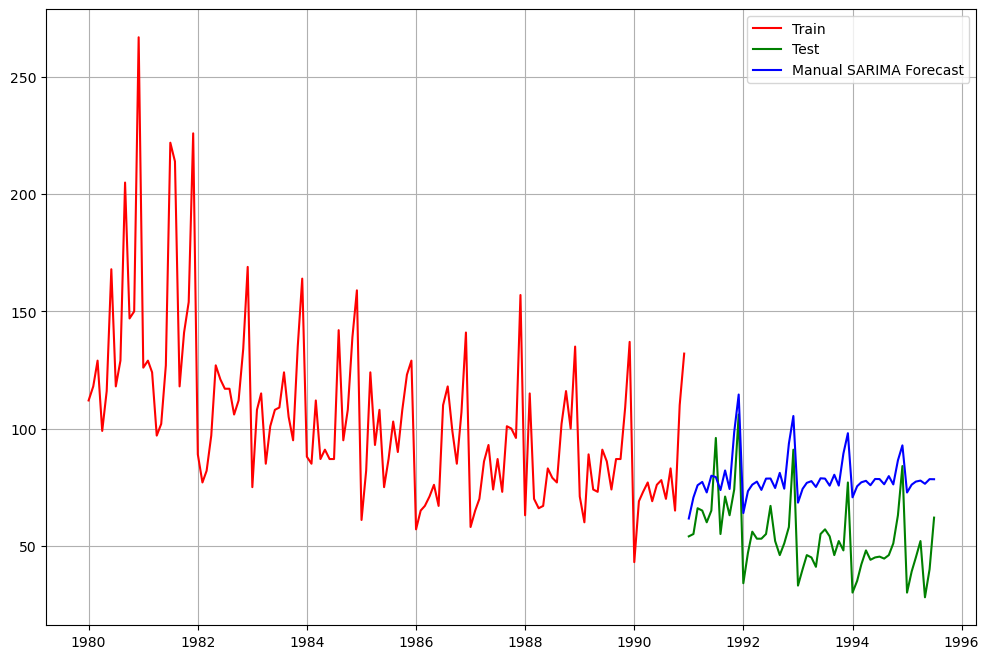

In [268]:
plt.figure(figsize=(12,8))
plt.plot(train["Rose"], color="Red", label="Train")
plt.plot(test["Rose"], color="Green", label="Test")
plt.plot(test["predicted_manual_SARIMA_12"], color="Blue", label="Manual SARIMA Forecast")
plt.legend(loc = 'best')
plt.grid();

In [286]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [288]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [290]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC.loc[len(SARIMA_AIC)] = {'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720736
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380891
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385747
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.691363575259
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945533
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918343
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383866
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.79363249174
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094819
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.857348329989
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535912
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.333243046168
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988256007755
SARIMA(0, 1, 2)x(0, 0, 0, 12

In [292]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.686926
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [294]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Sun, 15 Sep 2024   AIC                            887.938
Time:                                    22:46:23   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.872     -0.004      0.996    -372.984     371.299
ma.L2         -0.1573     29.830   

In [296]:
test["predicted_auto_SARIMA_12"]=results_auto_SARIMA_12.forecast(steps=len(test))

In [298]:
rmse_sarima = metrics.mean_squared_error(test['Rose'],test["predicted_auto_SARIMA_12"],squared=False)
print(rmse_sarima)
new_row10 = pd.DataFrame({'Test RMSE': [rmse_sarima]}
                           ,index=['Auto SARIMA(0,1,2)(2,0,2,12)'])


Model_Performance = pd.concat([Model_Performance,new_row10])
Model_Performance

26.95136044515928


,Test RMSE
Linear Regression,1.373747e+01
Simple Average,5.224342e+01
Moving Average Trailing 3,1.155867e+01
Moving Average Trailing 6,1.241272e+01
Moving Average Trailing 9,1.262176e+01
Simple Exponential Smoothing,3.645940e+01
Double Exponential Smoothing,3.645940e+01
Double Exponential Smoothing,1.456631e+01
Triple Exponential Smoothing,1.988783e+01
"Manual ARIMA(4,1,2)",3.706120e+01


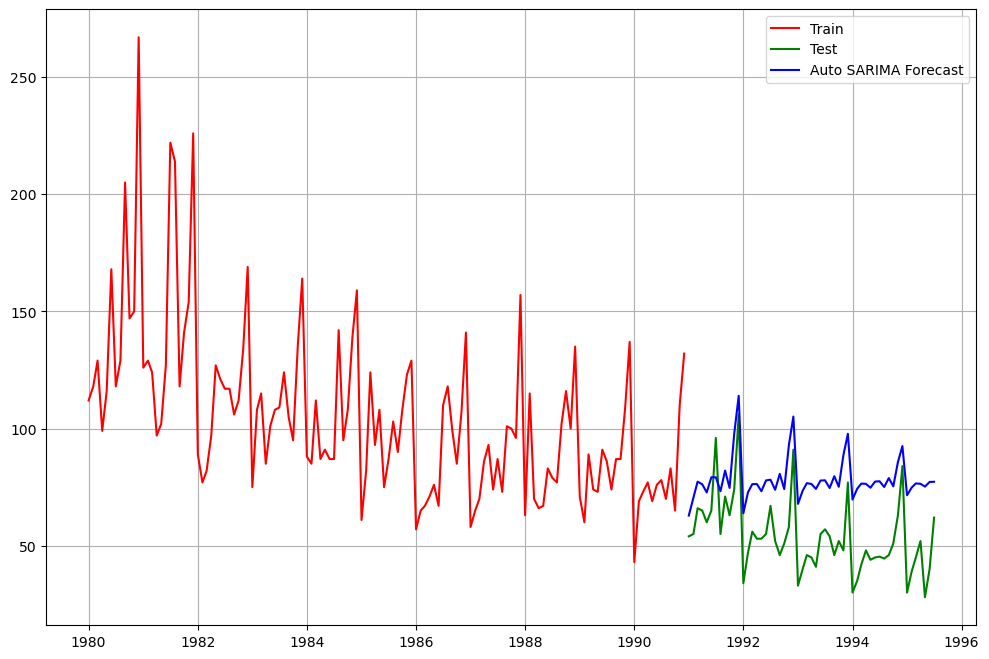

In [300]:
plt.figure(figsize=(12,8))
plt.plot(train["Rose"], color="Red", label="Train")
plt.plot(test["Rose"], color="Green", label="Test")
plt.plot(test["predicted_auto_SARIMA_12"], color="Blue", label="Auto SARIMA Forecast")
plt.legend(loc = 'best')
plt.grid();

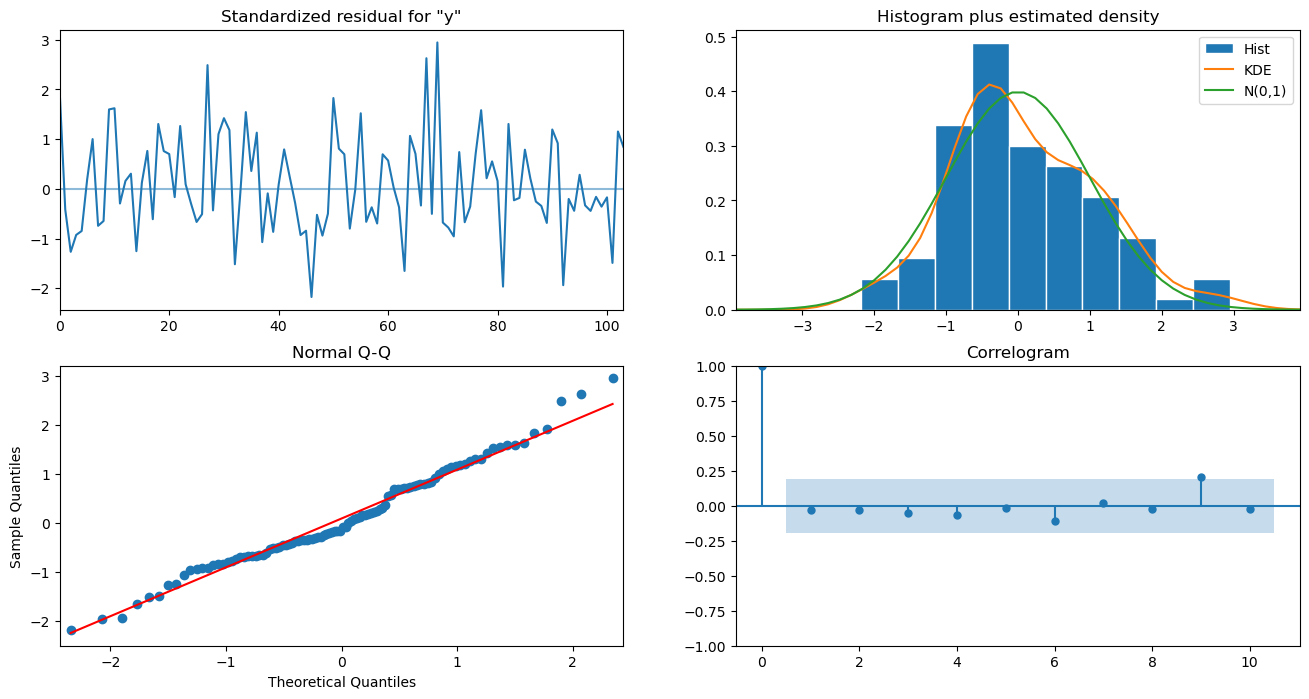

In [302]:
results_auto_SARIMA_12.plot_diagnostics(figsize=(16, 8))
plt.show()

In [304]:
full_data_model = sm.tsa.statespace.SARIMAX(df_copy['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -647.350
Date:                            Sun, 15 Sep 2024   AIC                           1308.699
Time:                                    23:00:28   BIC                           1330.182
Sample:                                01-01-1980   HQIC                          1317.423
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7655      0.088     -8.740      0.000      -0.937      -0.594
ma.L2         -0.1390      0.081   

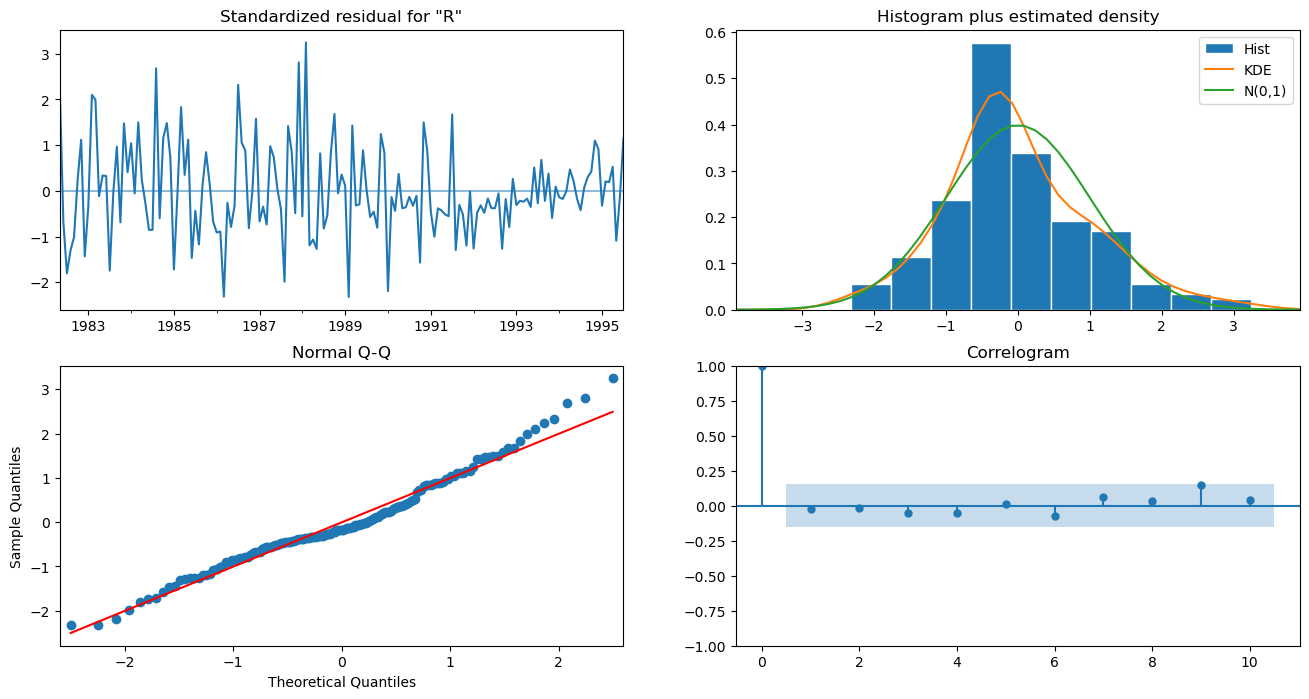

In [306]:
results_full_data_model.plot_diagnostics(figsize=(16, 8));

In [308]:
predicted_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [310]:
predicted_SARIMA_12_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,46.901483,14.114419,19.237731,74.565236
1995-09-01,44.057391,14.497394,15.643022,72.471761
1995-10-01,47.154458,14.559916,18.617547,75.691370
1995-11-01,52.482041,14.622171,23.823112,81.140970
1995-12-01,69.585574,14.684162,40.805145,98.366003


In [312]:
rmse = metrics.mean_squared_error(df_copy['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 27.676691224811428


In [314]:
pred_full_manual_SARIMA_date = predicted_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-07-01', freq='MS'))
pred_full_manual_SARIMA_date

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,46.901483,14.114419,19.237731,74.565236
1995-09-01,44.057391,14.497394,15.643022,72.471761
1995-10-01,47.154458,14.559916,18.617547,75.691370
1995-11-01,52.482041,14.622171,23.823112,81.140970
1995-12-01,69.585574,14.684162,40.805145,98.366003
1996-01-01,32.328744,14.745893,3.427326,61.230163
1996-02-01,37.818449,14.807366,8.796546,66.840353
1996-03-01,42.275978,14.868585,13.134088,71.417869
1996-04-01,46.097569,14.929553,16.836183,75.358954
1996-05-01,35.227714,14.990273,5.847320,64.608109


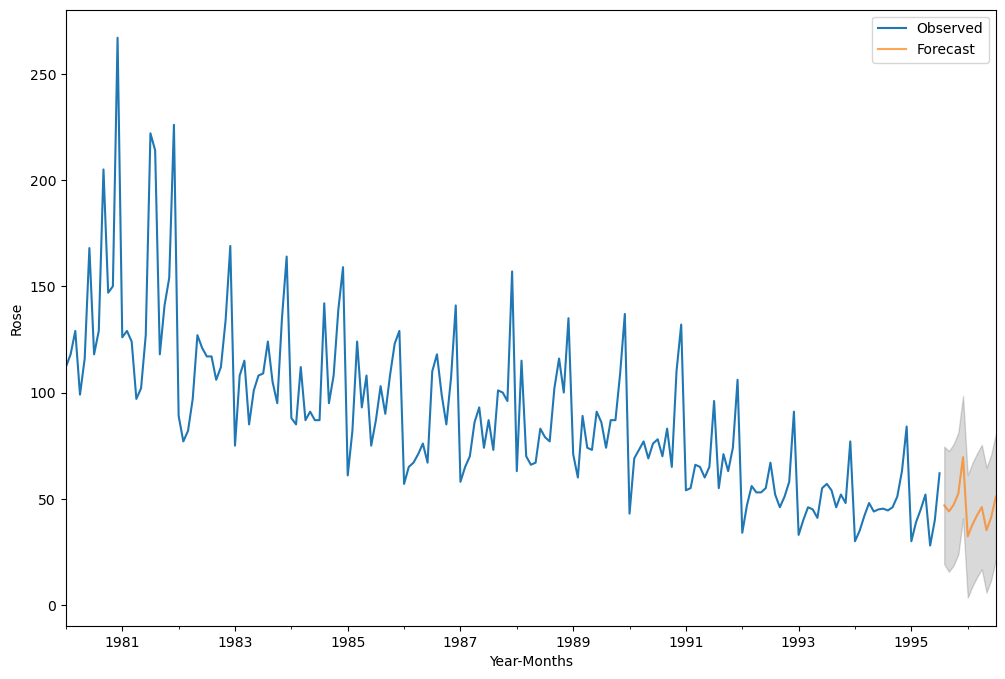

In [316]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = df_copy['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()